#Creando Nombres

In [1]:
import pandas as pd

In [2]:
nombres_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200")
nombres_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200")

In [3]:
nombres_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
nombres_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [5]:
type(nombres_m)

pandas.core.frame.DataFrame

In [6]:
print("Cantidad de nombres: " + str(len(nombres_m) + len(nombres_f)))

Cantidad de nombres: 400


In [7]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [8]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
170,ALEXANDRO
73,JANAINA
169,WELLINGTON
0,JOSE
16,EDUARDO


#Incluyendo ID de alumnos

In [9]:
import numpy as np

In [10]:
np.random.seed(123)

In [11]:
total_alumnos = len(nombres)
total_alumnos

400

In [12]:
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [13]:
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [14]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [15]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [16]:
import html5lib

In [17]:
url = 'https://www.tiobe.com/tiobe-index/'

In [18]:
cursos = pd.read_html(url)
cursos = cursos[2].iloc[:,:1]
cursos

,Programming Language
0,Python
1,C
2,Java
3,C++
4,C#
5,Visual Basic
6,JavaScript
7,SQL
8,Assembly language
9,PHP


In [19]:
type(cursos)

pandas.core.frame.DataFrame

In [20]:
cursos

,Programming Language
0,Python
1,C
2,Java
3,C++
4,C#
5,Visual Basic
6,JavaScript
7,SQL
8,Assembly language
9,PHP


In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head()

,Programming Language
0,Python
1,C
2,Java
3,C++
4,C#


#Adicionando Index

In [23]:
cursos = cursos.rename(columns={'Programming Language' : 'nombre_curso'})

In [24]:
cursos

,nombre_curso
0,Python
1,C
2,Java
3,C++
4,C#
5,Visual Basic
6,JavaScript
7,SQL
8,Assembly language
9,PHP


In [25]:
cursos['id'] = cursos.index + 1
cursos

,nombre_curso,id
0,Python,1
1,C,2
2,Java,3
3,C++,4
4,C#,5
5,Visual Basic,6
6,JavaScript,7
7,SQL,8
8,Assembly language,9
9,PHP,10


In [26]:
cursos = cursos.set_index('id')
cursos.head()

,nombre_curso
id,
1,Python
2,C
3,Java
4,C++
5,C#


In [27]:
cursos.shape

(15, 1)

#Matriculando Alumnos

In [28]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [29]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [30]:
import seaborn as sns

<ipython-input-31-68059771b3aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

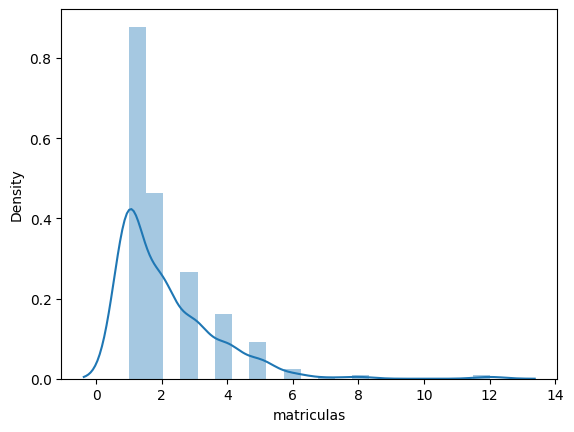

In [31]:
sns.distplot(nombres.matriculas)

In [32]:
nombres.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [33]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [34]:
cursos.head()

,nombre_curso
id,
1,Python
2,C
3,Java
4,C++
5,C#


In [35]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([1.46161251e-01, 2.21709910e-02, 7.39424417e-02, 3.68571153e-02,
       1.33195632e-01, 7.24203839e-02, 2.42538134e-05, 4.68571962e-02,
       3.62717508e-02, 1.33396093e-02, 9.47045583e-02, 6.01152599e-02,
       3.90601547e-02, 1.67113253e-01, 5.77661486e-02])

In [36]:
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno','id_curso'])

In [37]:
matriculas.head()

,id_alumno,id_curso
0,235,1
1,43,8
2,304,14
3,304,14
4,304,2


In [38]:
matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])

,id_alumno,nombre_curso
id_curso,,
1,135,Python
2,18,C
3,67,Java
4,41,C++
5,99,C#
6,53,Visual Basic
8,40,SQL
9,30,Assembly language
10,7,PHP


In [39]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending=False)

In [40]:
matriculas_por_curso

,nombre_curso,Total
id_curso,,
14,Pascal,150
1,Python,135
5,C#,99
11,Objective-C,90
3,Java,67
12,Ada,60
6,Visual Basic,53
4,C++,41
8,SQL,40


#Salida en diferentes formatos

In [41]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [42]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [43]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)

#Creando Banco SQL

In [44]:
!pip show sqlalchemy | grep 'Name|Version'
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [45]:
matriculas_por_curso.head(3)

,nombre_curso,Total
id_curso,,
14,Pascal,150
1,Python,135
5,C#,99


In [46]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [47]:
matriculas_por_curso.to_sql('matriculas', engine)

14

In [48]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']


#Buscando en Banco SQL

In [49]:
query = 'select * from matriculas where total < 20'

In [50]:
pd.read_sql(sql=text(query), con=engine.connect())

,id_curso,nombre_curso,Total
0,2,C,18
1,10,PHP,7


In [51]:
matriculas

,id_alumno,id_curso
0,235,1
1,43,8
2,304,14
3,304,14
4,304,2
...,...,...
849,323,11
850,323,6
851,383,12
852,366,14


In [52]:
muchas_matriculas = pd.read_sql_table('matriculas', con=engine.connect(), columns=['nombre_curso', 'Total'])
muchas_matriculas

,nombre_curso,Total
0,Pascal,150
1,Python,135
2,C#,99
3,Objective-C,90
4,Java,67
5,Ada,60
6,Visual Basic,53
7,C++,41
8,SQL,40
9,(Visual) Basic,39


In [53]:
muchas_matriculas = muchas_matriculas.query('Total > 80')
muchas_matriculas

,nombre_curso,Total
0,Pascal,150
1,Python,135
2,C#,99
3,Objective-C,90


#Escribiendo en el Banco SQL

In [54]:
muchas_matriculas.to_sql('muchas_matriculas', engine)

4

In [55]:
#print(engine.table_names())
insp = inspect(engine)
print(insp.get_table_names())

['matriculas', 'muchas_matriculas']


In [56]:
insp.get_table_names()

['matriculas', 'muchas_matriculas']

#Nombres para el Ingreso

In [57]:
matriculas.sample(5)

,id_alumno,id_curso
568,248,14
61,12,15
13,310,1
371,394,15
455,138,1


In [67]:
id_curso = 15
proxima_clase = matriculas.query('id_curso == {}'.format(id_curso))
proxima_clase

,id_alumno,id_curso
20,92,15
25,218,15
30,34,15
53,287,15
55,80,15
58,16,15
61,12,15
67,172,15
120,391,15
134,281,15


In [68]:
nombres.sample(5)

,nombre,id_alumno,dominio,email,matriculas
147,LILIAN,315,@dominiodeemail.com,lilian@dominiodeemail.com,2
102,MARILENE,117,@dominiodeemail.com,marilene@dominiodeemail.com,1
11,GABRIEL,218,@dominiodeemail.com,gabriel@dominiodeemail.com,7
69,TEREZA,170,@serviciodeemail.com,tereza@serviciodeemail.com,1
7,FERNANDA,29,@serviciodeemail.com,fernanda@serviciodeemail.com,2


In [71]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

,nombre
id_alumno,
12,GUSTAVO
16,FABIO
25,FLAVIO
34,DANIEL
51,ISABEL
54,OSMAR
60,VICTOR
71,MARGARIDA
80,ANDRE


In [72]:
cursos.sample(5)

,nombre_curso
id,
12,Ada
2,C
6,Visual Basic
8,SQL
9,Assembly language


In [74]:
nombre_aula = cursos.loc[id_curso]
nombre_aula

nombre_curso    (Visual) Basic
Name: 15, dtype: object

In [75]:
nombre_aula = nombre_aula.nombre_curso
nombre_aula

'(Visual) Basic'

In [76]:
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

In [77]:
proxima_clase.sample(5)

,nombre
id_alumno,
152,CRISTIANE
118,ARNALDO
116,JONATAN
151,REGINALDO
16,FABIO


In [79]:
proxima_clase = proxima_clase.rename(columns={'nombre': 'Alumnos del curso de {}'.format(nombre_aula)})
proxima_clase.sample(5)

,Alumnos del curso de (Visual) Basic
id_alumno,
218,GABRIEL
12,GUSTAVO
116,JONATAN
118,ARNALDO
51,ISABEL


#Excel

In [81]:
proxima_clase.to_excel('proxima_clase.xlsx', index = False)

In [82]:
pd.read_excel('proxima_clase.xlsx')

,Alumnos del curso de (Visual) Basic
0,GUSTAVO
1,FABIO
2,FLAVIO
3,DANIEL
4,ISABEL
5,OSMAR
6,VICTOR
7,MARGARIDA
8,ANDRE
9,MARCOS
